<a href="https://colab.research.google.com/github/harnalashok/deeplearning/blob/main/tensorflow_custom_layers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# LAst amended: 24th Oct, 2023
#               VijayDashmi
# About python classes and tensorflow layers

In [ ]:
# 0.0 Reset all variables
%reset -f

In [ ]:
# 0.1 Import libraries
import tensorflow as tf
import tensorflow.keras
import numpy as np
import matplotlib.pyplot as plt



In [ ]:
# 0.2 Display multiple outputs from a Cell

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Classes in python
See this [link](https://docs.python.org/3/tutorial/classes.html)

Classes provide a means of bundling data and functionality together. Creating a new class creates a new type of object, allowing new instances of that type to be made. Each class instance can have attributes attached to it for maintaining its state. Class instances can also have methods (defined by its class) for modifying its state.

# Template of simplest class:
`class ClassName:`<br>
>    `<statement-1>`  <br>
>    `.`  <br>
>    `.`  <br>
>    `.`  <br>
>    `<statement-N>`<br>

In [ ]:
# 1.0 A very simple class:

class MyClass:
    """A simple example class"""
    i = 12345

    def f(self):
        return 'hello world'

 MyClass.i and MyClass.f are valid attribute references, returning an integer and a function object, respectively. Instantiate a class, as:

In [ ]:
# 1.1
x = MyClass()

# 1.1.0
type(x)

__main__.MyClass

The above instantiation operation (“calling” a class object) creates an empty object. If you want the object to contain some data, then use \_\_init\_\_() method, as:

In [ ]:
# 1.2 Another very simple class:

class MyClass:
    """A simple example class"""
    def __init__(self):
      self.data = []

    i = 12345

    def f(self):
        return 'hello world'

Of course, the \_\_init\_\_() method may have arguments for greater flexibility. In that case, arguments given to the class instantiation operator are passed on to \_\_init\_\_(). For example,

In [ ]:
# 2.0
class Complex:
    def __init__(self, realpart, imagpart):
        self.r = realpart
        self.i = imagpart

x = Complex(3.0, -4.5)
x.r, x.i

(3.0, -4.5)

Data attributes need not be declared; like local variables, they spring into existence when they are first assigned to. For example, if x is the instance of MyClass created above, the following piece of code will print the value 16, without leaving a trace:

In [ ]:
# 2.1
x.counter = 1    # This attribute created outside the class
while x.counter < 10:
    x.counter = x.counter * 2
print(x.counter)
del x.counter

16


Valid method names of an *instance object* depend on its class. By definition, all attributes of a class that are *function objects* define corresponding methods of its instances. So in our example, `x.f` is a `valid method` object, but `MyClass.f` is a function object.  But `x.f` is not the same thing as`MyClass.f` — the former is a *method* object, while the latter is a *function* object.

Class variable vs instance variable  
Generally speaking, instance variables are for data unique to each instance and class variables are for attributes and methods shared by all instances of the class:

In [ ]:
# 2.2
class Dog:

    kind = 'canine'         # class variable shared by all instances

    def __init__(self, name):
        self.name = name    # instance variable unique to each instance

In [ ]:
# 2.3
d = Dog('Fido')
e = Dog('Buddy')
d.kind                  # shared by all dogs
e.kind                  # shared by all dogs
d.name                  # unique to d
e.name

Shared data can have possibly surprising effects with involving mutable objects such as lists and dictionaries. For example, the `tricks` list in the following code should not be used as a class variable because just a single list would be shared by all Dog instances:

In [ ]:
# 2.4
class Dog:
    tricks = []             # mistaken use of a class variable

    def __init__(self, name):
        self.name = name

    def add_trick(self, trick):
        self.tricks.append(trick)

In [ ]:
# 2.4.1

d = Dog('Fido')
e = Dog('Buddy')
d.add_trick('roll over')
e.add_trick('play dead')
d.tricks                # unexpectedly shared by all dogs

Correct design of the class should use an instance variable instead:

In [ ]:
# 3.0
class Dog:

    def __init__(self, name):
        self.name = name
        self.tricks = []    # creates a new empty list for each dog

    def add_trick(self, trick):
        self.tricks.append(trick)

Data attributes may be referenced by methods as well as by ordinary users (“clients”) of an object. In other words, classes are not usable to implement pure abstract data types. In fact, nothing in Python makes it possible to enforce data hiding — it is all based upon convention. Often, the first argument of a method is called self. This is nothing more than a convention: the name self has absolutely no special meaning to Python. Methods may call other methods by using method attributes of the self argument.

In [ ]:
# 3.1
class Bag:
    def __init__(self):
        self.data = []

    def add(self, x):
        self.data.append(x)

    def addtwice(self, x):
        self.add(x)
        self.add(x)

### Class inheritance

Of course, a language feature would not be worthy of the name “class” without supporting inheritance. The syntax for a derived class definition looks like this:

class DerivedClassName(BaseClassName):  
>    `<statement-1>` <br>
>    `.` <br>
>    `.`<br>
>    `.`<br>
>    `<statement-N>`<br>

When the base class is defined in another module:

In [ ]:
# 3.2
class DerivedClassName(modname.BaseClassName):

Execution of a derived class definition proceeds the same as for a base class. When the class object is constructed, the base class is remembered. This is used for resolving attribute references: if a requested attribute is not found in the class, the search proceeds to look in the base class. This rule is applied recursively if the base class itself is derived from some other class.

There’s nothing special about instantiation of derived classes: DerivedClassName() creates a new instance of the class. Method references are resolved as follows: the corresponding class attribute is searched, descending down the chain of base classes if necessary, and the method reference is valid if this yields a function object.

Derived classes may override methods of their base classes. Because methods have no special privileges when calling other methods of the same object, a method of a base class that calls another method defined in the same base class may end up calling a method of a derived class that overrides it.   

There is a simple way to call the base class method directly: just call BaseClassName.methodname(self, arguments). This is occasionally useful to clients as well. (Note that this only works if the base class is accessible as BaseClassName in the global scope.)

### Private variables

“Private” instance variables that cannot be accessed except from inside an object don’t exist in Python. However, there is a convention that is followed by most Python code: a name prefixed with an underscore (e.g. \_spam) should be treated as a non-public part of the API (whether it is a function, a method or a data member). It should be considered an implementation detail and subject to change without notice.   

Since there is a valid use-case for class-private members (namely to avoid name clashes of names with names defined by subclasses), there is limited support for such a mechanism, called name mangling. Any identifier of the form <i>\_\_spam</i> (at least two leading underscores, at most one trailing underscore) is textually replaced with <i>\_classname\_\_spam</i>, where classname is the current class name with leading underscore(s) stripped. This mangling is done as long as it occurs within the definition of a class.

### What if \_\_init\_\_() method is absent?



Methods are inherited from parent classes. Unless you override a method in a child class (by redefining it there), the parent's method implementation is used. This goes for all all methods, including <i>\_\_init\_\_</i>.

In [ ]:
# 4.0
class Foo:
    def __init__(self):
        print('foo')

# 4.1
class Bar(Foo):
    pass


In [ ]:
# 4.1.1
Bar()  # outputs 'foo'


foo


### What is the difference between *\_\_init\_\_* and *\_\_call\_\_*?

See [here](https://stackoverflow.com/a/9663601/3282777)

In [ ]:
# 5.0
class test:

  def __init__(self,n):
    self.a = 10
    self.y = n

  def __call__(self):
    print("b = 20")


In [ ]:
# 5.1 First instantiate the class
c = test(20)
c.a
print("\n=========\n")
c.y

10

20

In [ ]:
# 5.2 You can class instance as a function
#  __call__() is invoked:
n = c()

b = 20


*\_\_init\_\_()* is used to initialise newly created object, and receives arguments used to do that:

In [ ]:
# 5.3
class Foo:
    def __init__(self, a, b, c):
        pass




In [ ]:
# 5.4
x = Foo(1, 2, 3) # __init__

The second implements function call operator. Defining a custom \_\_call\_\_() method allows the class's instance to be called as a function, not always modifying the instance itself.

In [ ]:
# 5.5
class Foo:
    def __call__(self, a, b, c):
        pass

x = Foo()
x(1, 2, 3) # __call__


## Matrix multiplication  
And type checking

In [ ]:
# 6.0 Define two tensors of different shape:

a = tf.constant([1, 2, 3, 4, 5, 6],
                shape=[2, 3])

b = tf.constant([7, 8, 9, 10, 11, 12],
                shape=[3, 2])
a
b

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[1, 2, 3],
       [4, 5, 6]], dtype=int32)>

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[ 7,  8],
       [ 9, 10],
       [11, 12]], dtype=int32)>

In [ ]:
# 6.1 Matrix multiplication:
#     2 X 3 multiply with 3 X 2
#     to get 2 X 2:

tf.matmul(a,b)

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[ 58.,  64.],
       [139., 154.]], dtype=float32)>

In [ ]:
# 6.2 Tensors with different data types:

a = tf.constant([1, 2, 3, 4, 5, 6],
                shape=[2, 3],
                dtype = 'float32'
                )
b = tf.constant([7, 8, 9, 10, 11, 12],
                shape=[3, 2]
                )
a
b

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)>

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[ 7,  8],
       [ 9, 10],
       [11, 12]], dtype=int32)>

In [ ]:
# 6.3 This multiplication fails because
#     of strict dtype checking in tensorflow:

tf.matmul(a,b)

In [ ]:
# 6.4 Cast b to float:
b = tf.cast(b, dtype = tf.float32)

In [ ]:
# 6.5 This succeeds

tf.matmul(a,b)

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[ 58.,  64.],
       [139., 154.]], dtype=float32)>

About weights initializer:  
(see [here](https://stackoverflow.com/a/37350251/3282777))

If weights initializer is None (the default), the default initializer passed is  glorot_uniform_initializer.  
> The Glorot uniform initializer, also called Xavier uniform initializer. It draws samples from a uniform distribution within `[-limit, limit]`, where limit is `sqrt(6 / (fan_in + fan_out))`
where `fan_in` is the number of input units in the weight tensor
and `fan_out` is the number of output units in the weight tensor.

## Custom layer
See [here](https://www.tensorflow.org/guide/keras/making_new_layers_and_models_via_subclassing)   
Other references [here](https://www.tensorflow.org/guide/intro_to_modules) and [here](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Layer#add_weight) and [here](https://www.tensorflow.org/tutorials/customization/custom_layers)

One of the central abstractions in Keras is the Layer class. A layer encapsulates two things:

>A state (the layer's "weights"), and, <br>

>A transformation from inputs to outputs (a "call", the layer's forward pass).

Here's a densely-connected layer. It has a state: the variables w and b.

In [ ]:
# 7.0 Define a layer
# https://www.tensorflow.org/guide/keras/making_new_layers_and_models_via_subclassing

class Linear(tf.keras.layers.Layer):
    def __init__(self, units=32, input_dim=32):
        super().__init__()

        self.w = self.add_weight(
                                  shape=(input_dim, units),
                                  initializer="random_normal",
                                  trainable=True
                                )

        self.b = self.add_weight(
                                 shape=(units,),
                                 initializer="zeros",
                                 trainable=True
                                 )

    def call(self, inputs):
        return tf.matmul(inputs, self.w) + self.b

You could use this layer, as:

In [ ]:
# 7.1 Our input
x = tf.ones((2, 2))
x

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[1., 1.],
       [1., 1.]], dtype=float32)>

In [ ]:
# 7.2 Instantiate the layer:
linear_layer = Linear(4, 2)

# 7.3 Use the instance as a function:
y = linear_layer(x)  # Same as: Linear(4, 2)(x)
print(y)


tf.Tensor(
[[ 0.1159199   0.02221491  0.00828999 -0.02238546]
 [ 0.1159199   0.02221491  0.00828999 -0.02238546]], shape=(2, 4), dtype=float32)


In many cases, you may not know in advance the size of your inputs, and you would like to lazily create weights when that value becomes known, some time after instantiating the layer.

In the Keras API, we recommend creating layer weights in the build(self, inputs_shape) method of your layer. Like this:

In [ ]:
# 8.0
class Linear(tf.keras.layers.Layer):
    def __init__(self, units=32):
        super().__init__()
        self.units = units

    def build(self, input_shape):
        self.w = self.add_weight(
                                  shape=(input_shape[-1], self.units),
                                  initializer="random_normal",
                                  trainable=True,
                                )

        self.b = self.add_weight(
                                  shape=(self.units,),
                                  initializer="random_normal",
                                  trainable=True
                                )

    def call(self, inputs):
        return tf.matmul(inputs, self.w) + self.b

The <i>\_\_call\_\_()<i> method of your layer will automatically run `build()` the first time it is called. You now have a layer that's lazy and thus easier to use:

In [ ]:
# 8.1 At instantiation, we don't know on what inputs this is going to get called
linear_layer = Linear(32)

# 8.2 The layer's weights are created dynamically the first time the layer is called
y = linear_layer(x)    # Same as: Linear(32)(x)


A custom layer can be created by passing the base layer `tf.keras.layers.Layer`. This base layer has certain properties and methods but they can be expressely (if required) overridden in the subclass.




The best way to implement your own layer is extending the `tf.keras.Layer` class and implementing three methods:
> <i>\_\_init\_\_()</i> , where you can do all <b>input-independent initialization</b>  

> `build()`, where you know the shapes of the input tensors and can do the rest of the initialization  

>`call()`, where you do the forward computation


More [explanation](https://stackoverflow.com/a/63386626/3282777):

The `Layer.build()` method is typically used to instantiate the weights of the layer. See the source code for `tf.keras.layers.Dense` for an example, and note that the weight and bias tensors are created in that function. The `Layer.build()` method takes an `input_shape` argument, and the shape of the weights and biases often depend on the shape of the input.

The `Layer.call()` method, on the other hand, implements the forward-pass of the layer. You do not want to overwrite <i>\_\_call\_\_</i> because that is implemented in the base class `tf.keras.layers.Layer`. In a custom layer, you should implement `call()`.

`Layer.call()` does not call `Layer.build()`. However, `Layer().__call__()` does call it if the layer has not been built yet (source), and that will set an attribute `self.built = True` to prevent `Layer.build()` from being called again. In other words, `Layer.__call__()` only calls `Layer.build()` the first time it is called.


In [ ]:
# 9.0
# https://www.tensorflow.org/tutorials/customization/custom_layers

class MyDenseLayer(tf.keras.layers.Layer):
  def __init__(self, num_outputs):
    #
    super(MyDenseLayer, self).__init__()
    self.num_outputs = num_outputs  # No of output neurons

  # Generally used for weights initialization
  def build(self, input_shape):
    self.kernel = self.add_weight(name = "kernel",
                                  initializer = None,    # default
                                  shape=[int(input_shape[-1]), # Input layer
                                         self.num_outputs])
  # Forward pass
  def call(self, inputs):
    return tf.matmul(inputs, self.kernel)



In [ ]:
# 9.1 Initialize the class object:

layer = MyDenseLayer(10)


In [ ]:
# 9.2 Input matrix a
a
print("\n===========\n")
a.numpy().shape
print("\n===========\n")
layer(a)
print("\n===========\n")
np.round(layer.kernel.numpy(),2)
print("\n===========\n")
np.round(layer.kernel.numpy(),2).shape
print("\n===========\n")
layer(a).shape

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)>

(2, 3)

<tf.Tensor: shape=(2, 10), dtype=float32, numpy=
array([[ 1.2649858 , -2.2285457 ,  0.18772945, -1.7334996 ,  1.3389293 ,
        -2.1516857 , -1.2864588 , -0.41845858, -0.2842124 ,  0.10736054],
       [ 1.8323687 , -5.6919317 , -0.2275815 , -2.7392569 ,  1.8457786 ,
        -4.8639874 , -1.4462526 , -0.5675663 , -0.3992206 ,  0.94588125]],
      dtype=float32)>

array([[-0.61, -0.52, -0.28,  0.4 , -0.4 , -0.32,  0.61,  0.36,  0.34,
         0.61],
       [ 0.52, -0.19, -0.05, -0.08, -0.03,  0.08, -0.1 , -0.45, -0.52,
        -0.5 ],
       [ 0.28, -0.44,  0.19, -0.66,  0.6 , -0.66, -0.57,  0.04,  0.14,
         0.16]], dtype=float32)

(3, 10)

TensorShape([2, 10])

In [ ]:
# 9.3
layer.kernel
# 9.3.1
s = layer.kernel

<tf.Variable 'my_dense_layer_3/kernel:0' shape=(3, 10) dtype=float32, numpy=
array([[-0.61042124, -0.5230473 , -0.27518252,  0.40325987, -0.3993114 ,
        -0.32045314,  0.61470735,  0.35913384,  0.34457064,  0.6137085 ],
       [ 0.52323973, -0.18874598, -0.05267543, -0.07877743, -0.03345728,
         0.08029026, -0.10274953, -0.44891676, -0.51993716, -0.49625695],
       [ 0.2763092 , -0.4426688 ,  0.18942094, -0.6597349 ,  0.6017184 ,
        -0.66393775, -0.5652224 ,  0.04008037,  0.13703042,  0.16205531]],
      dtype=float32)>

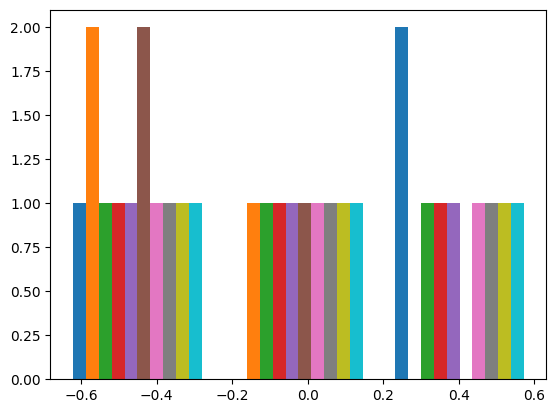

In [ ]:
# 9.3.2
_ = plt.hist(s.numpy(),bins = 3);

In [ ]:
#######################